In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

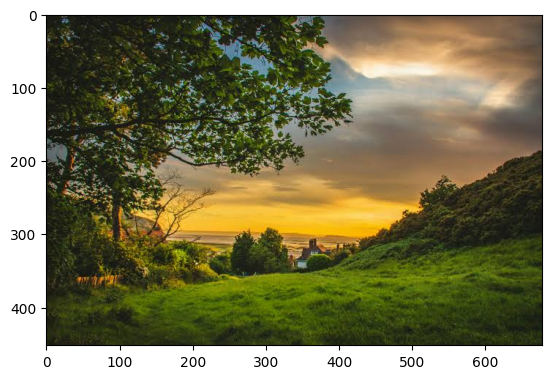

In [2]:
# Load the image
image = ('/content/landscape.jpg')
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
plt.imshow(image)

In [3]:
image.shape

(452, 678, 3)

In [4]:
#Reshape the image into a 2D array of pixels and color values RGB
pixels_values=image.reshape((-1,3))
pixels_values.shape

(306456, 3)

In [5]:
pixels_values

array([[31, 32, 24],
       [26, 27, 19],
       [23, 24, 16],
       ...,
       [34, 39, 17],
       [34, 39, 17],
       [34, 39, 17]], dtype=uint8)

In [6]:
pixels_values=np.float32(pixels_values)

In [7]:
from sklearn.cluster import KMeans

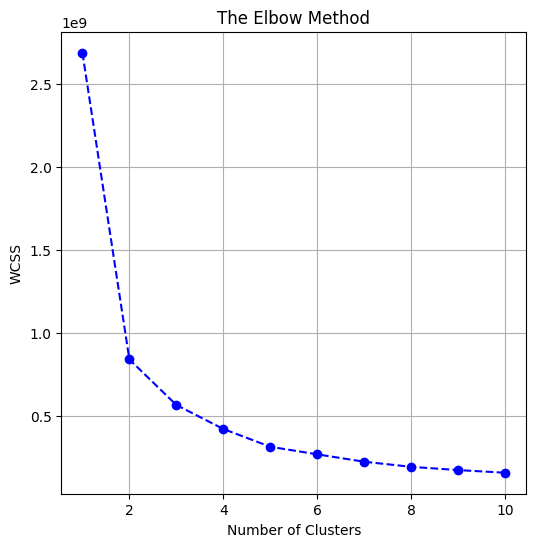

In [8]:
wcss = []

# Calculate WCSS for different number of clusters
for i in range(1, 11):  # Testing for clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(pixels_values)  # Fit the model to your dataset
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS value)

# Plotting the Elbow Method graph
plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')  # Adds markers and lines for clarity
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)  # Optional: adds a grid for easier visualization
plt.show()

In [11]:
# Define the number of clusters(k)
k=3
#Apply kmeans clustering
kmeans=KMeans(n_clusters=k,init='k-means++',n_init=10,random_state=0)
kmeans.fit(pixels_values)


KMeans(n_clusters=3, n_init=10, random_state=0)

In [16]:
# Get the cluster senters
centers=np.uint8(kmeans.cluster_centers_)
# Map each pixel to its closest cluster center
labels=kmeans.labels_

In [17]:
# Reshape labels back to the Original image dimension
segmented_image=centers[labels.flatten()]
segmented_image=segmented_image.reshape(image.shape)

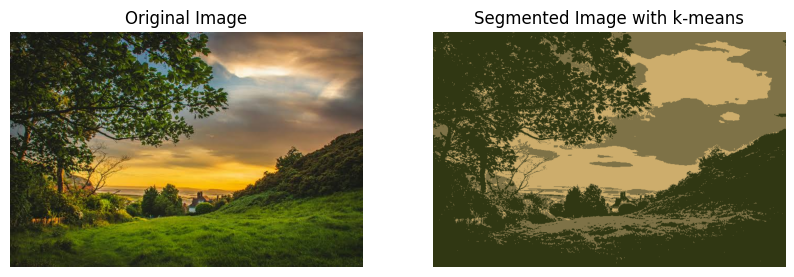

In [15]:
#Display the Oringinal and Segmented Images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image with k-means')
plt.axis('off')

plt.show()